In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ppscore as pps
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
data = pd.read_csv('AggregatedData.csv')
data.head(5)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH


count      11589.0
mean      522306.0
std       324817.0
min          100.0
25%       305700.0
50%       470000.0
75%       671600.0
max      2549800.0
Name: Total amount Withdrawn, dtype: float64

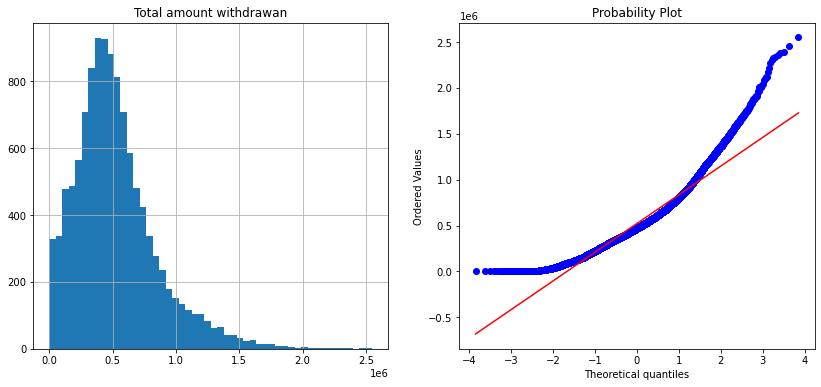

In [2]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
data['Total amount Withdrawn'].hist(bins=50)
plt.title('Total amount withdrawan')
plt.subplot(1,2,2)
stats.probplot(data['Total amount Withdrawn'], plot=plt);
data['Total amount Withdrawn'].describe().T.round()
#data=pd.get_dummies(data,columns=['weekday','festival_religion','working_day','holiday_sequence'])

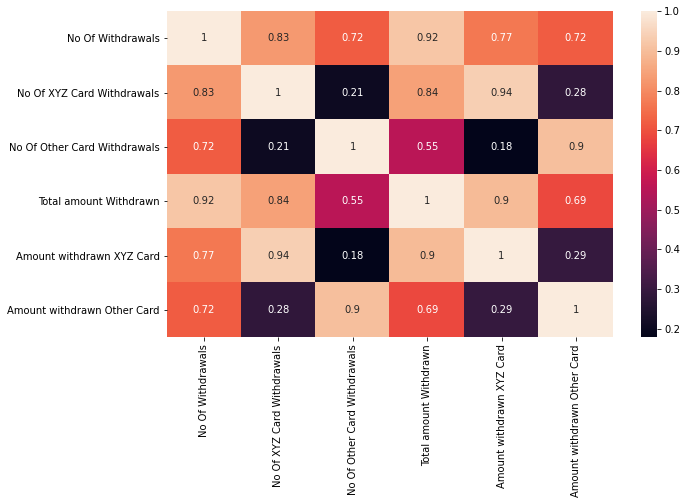

In [3]:
corr = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()

In [4]:
# Copy the original data
features = data.copy()
# Select the numeric columns
numeric_subset = data[['Transaction Date','No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals', 'Total amount Withdrawn', 'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card']]
# Select the categorical columns
# dropped atm_name
categorical_subset = data[['Weekday','Festival Religion', 'Working Day',  'Holiday Sequence']]
# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset)
# Join the two dataframes using concat
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features.head(5)

,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday_FRIDAY,Weekday_Friday,Weekday_MONDAY,...,Working Day_H,Working Day_W,Holiday Sequence_HHH,Holiday Sequence_HHW,Holiday Sequence_HWH,Holiday Sequence_HWW,Holiday Sequence_WHH,Holiday Sequence_WHW,Holiday Sequence_WWH,Holiday Sequence_WWW
0,1/1/2011,50,20,30,123800,41700,82100,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1/1/2011,253,67,186,767900,270900,497000,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1/1/2011,98,56,42,503400,347700,155700,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1/1/2011,265,159,106,945300,532600,412700,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1/1/2011,74,25,49,287700,148200,139500,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [5]:
X = features.copy().drop(columns = ['No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals', 'Total amount Withdrawn', 'Transaction Date', 'Working Day_H', 'Working Day_W'])
y = features['Total amount Withdrawn'].copy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle= False, test_size = 0.2, random_state = 42)
print('length of Xtrain and Xtest: ', len(Xtrain), len(Xtest))
print('length of ytrain and ytest: ', len(ytrain), len(ytest))

length of Xtrain and Xtest:  9271 2318
length of ytrain and ytest:  9271 2318


In [9]:
linear = LinearRegression()
linear.fit(Xtrain, ytrain)
# make predictions
lin_pred = linear.predict(Xtest)
# Prediction vs Actual
linpred = pd.DataFrame(lin_pred[-10:]) # predicting last 10 values
linpred.rename(columns = {0: 'predicted'}, inplace=True) # renaming the column
linpred = linpred.round(decimals=0) # rounding the decimal values
d = pd.DataFrame(data['Total amount Withdrawn']).tail(10) # calling last 10 values of original amt wothdrawn
d=d.rename({'Total amount Withdrawn':'Actual'}, axis=1)
linpred.index = d.index # mapping the index of both dataframe
d['ATM Name']=data['ATM Name'].tail(10)
linok = pd.concat([linpred, d], axis=1)
linok['accuracy'] = round(linok.apply(lambda row: row.predicted /row.Actual *100, axis = 1),2)
linok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in linok['accuracy']],index = linok.index)
linpred
d
linok.index.names=['BANK_ID']
linok
# linok = linok.assign(day_of_week = lambda x: x.linok.index.data())

,predicted,Actual,ATM Name,accuracy
BANK_ID,,,,
11579,468600.0,468600,Big Street ATM,100.00%
11580,317400.0,317400,Mount Road ATM,100.00%
11581,424700.0,424700,Airport ATM,100.00%
11582,1154900.0,1154900,KK Nagar ATM,100.00%
11583,1120300.0,1120300,Christ College ATM,100.00%
11584,468800.0,468800,Big Street ATM,100.00%
11585,305100.0,305100,Mount Road ATM,100.00%
11586,709900.0,709900,Airport ATM,100.00%
11587,408700.0,408700,KK Nagar ATM,100.00%


In [38]:
from sklearn import metrics
lin_test=ytest.mean()
pred=lin_pred.mean()
print(lin_test,pred)
accuracy=pred/lin_test
print(accuracy*100)

426007.9810181191 426007.981018119
99.99999999999999


In [39]:
print('Variance:', linear.score(Xtest, ytest))


Variance: 1.0


In [40]:
MAE_lr=metrics.mean_absolute_error(ytest,lin_pred)
MSE_lr=metrics.mean_squared_error(ytest,lin_pred)
RMSE_lr=np.sqrt(MSE_lr)
r2_lr=metrics.r2_score(ytest,lin_pred)

print(MAE_lr)
print(MSE_lr)
print(RMSE_lr)                    
print(r2_lr)

2.4261731230124355e-10
1.311851734153433e-19
3.6219493841761967e-10
1.0
